In [1]:
import pandas as pd
import time
from IPython.display import display
import numpy as np
import copy
import plotly as py
import math
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
Nifty50 = pd.read_csv('G:\\True Beacon Project\\Nifty50 Data March 20 to Feb 21.csv')
Nifty50 = Nifty50.drop(Nifty50.columns[[1,2,3,5,6]], axis=1)
Portfolio = pd.read_csv('G:\\True Beacon Project\\Open Ended Schemes ( Equity Scheme - Large Cap Fund ) 2 March 20 to 1 march 21.csv')

In [3]:
Portfolio["Daily Return"] = Portfolio["Net Asset Value"].pct_change(1)
Nifty50["Daily Return"] = Nifty50["Close"].pct_change(1)

In [4]:
Portfolio["Cum_Daily_Return"] = (1 + Portfolio["Daily Return"]).cumprod()
Nifty50["Cum_Daily_Return"] = (1 + Nifty50["Daily Return"]).cumprod()

In [5]:
CAGR_Portfolio = (Portfolio["Cum_Daily_Return"][247]/Portfolio["Cum_Daily_Return"][1]-1)
CAGR_Nifty50 = (Nifty50["Cum_Daily_Return"][247]/Nifty50["Cum_Daily_Return"][1]-1)

In [6]:
SharpeRatio_Portfolio=(CAGR_Portfolio-0.025)/(Portfolio["Daily Return"].std() * np.sqrt(252*78))
SharpeRatio_Nifty50=(CAGR_Nifty50-0.025)/(Nifty50["Daily Return"].std() * np.sqrt(252*78))

In [7]:
Portfolio["Cum_Roll_Max"] = Portfolio["Cum_Daily_Return"].cummax()
Portfolio["Drawdown"] = Portfolio["Cum_Roll_Max"] - Portfolio["Cum_Daily_Return"]
Portfolio["Drawdown_pct"] = Portfolio["Drawdown"]/Portfolio["Cum_Roll_Max"]
MaxDD_Portfolio = Portfolio["Drawdown_pct"].max()

Nifty50["Cum_Roll_Max"] = Nifty50["Cum_Daily_Return"].cummax()
Nifty50["Drawdown"] = Nifty50["Cum_Roll_Max"] - Nifty50["Cum_Daily_Return"]
Nifty50["Drawdown_pct"] = Nifty50["Drawdown"]/Nifty50["Cum_Roll_Max"]
MaxDD_Nifty50 = Nifty50["Drawdown_pct"].max()

In [8]:
Portfolio["Close"] = Portfolio["Net Asset Value"]
data = pd.DataFrame
data = pd.concat([Portfolio["Close"],Nifty50["Close"]], join = 'outer', axis = 1)
data.columns = ["Portfolio", "Nifty50"]

In [9]:
sec_returns = np.log(data/data.shift(1))

In [10]:
cov = sec_returns.cov() * 250

In [11]:
corr = sec_returns.corr()

In [12]:
cov_withBenchmark = cov.iloc[0,1]
cov_withBenchmark

0.08227856601057447

In [13]:
market_var = sec_returns['Nifty50'].var() * 250
market_var

0.10394621088492484

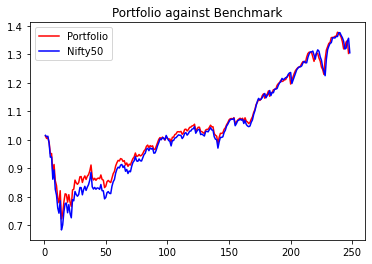

In [14]:
a = Portfolio["Cum_Daily_Return"]
b = Nifty50["Cum_Daily_Return"]

plt.plot(a, 'r') # plotting t, a separately 
plt.plot(b, 'b') # plotting t, b separately 

plt.legend(['Portfolio', 'Nifty50']) 
plt.title("Portfolio against Benchmark")
plt.show()

In [15]:
data = {'Portfolio':[CAGR_Portfolio,SharpeRatio_Portfolio,MaxDD_Portfolio, Portfolio["Cum_Daily_Return"][247]], 'Nifty50':[CAGR_Nifty50,SharpeRatio_Nifty50,MaxDD_Nifty50, Nifty50["Cum_Daily_Return"][247]]} 
df = pd.DataFrame(data, index =['CAGR', 
                                'Sharpe ratio', 
                                'Max Drawdown',
                                'Return']) 
df 

,Portfolio,Nifty50
CAGR,0.285873,0.335659
Sharpe ratio,0.105738,0.110283
Max Drawdown,0.287356,0.326723
Return,1.302780,1.356120


In [16]:
Portfolio_Beta = cov_withBenchmark/market_var
print("Beta = ", Portfolio_Beta)
Portfolio_ExpectedReturn = 0.025 + Portfolio_Beta * 0.05
print("Expected Return = ", Portfolio_ExpectedReturn)
Sharpe_ExpectedReturn = (Portfolio_ExpectedReturn -0.025) / (sec_returns['Portfolio'].std()*250**0.5)
print("Sharpe from Expected Return of the Portfolio = ", Sharpe_ExpectedReturn)
RSquared = (corr.iloc[0,1])**2
print("R-Squared = ", RSquared)
SD = Portfolio["Daily Return"].std()*100*np.sqrt(252)
print("Standard Deviation = ", SD)

Beta =  0.7915494495673551
Expected Return =  0.06457747247836776
Sharpe from Expected Return of the Portfolio =  0.14026419127078088
R-Squared =  0.8272835462504259
Standard Deviation =  27.93511826475759
